<a href="https://colab.research.google.com/github/ParthPatel101/iSPY/blob/main/iSPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This program uses LSTM (Long Short Term Memory) to predict the stock price of the SPY 500 index using past data.

In [74]:
import math
import pandas_datareader as web
import yfinance as yf
import datetime as dt
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [75]:
# Full dataset from the start of SPY to today
start = dt.datetime(1993, 1, 1)
end = dt.datetime.today()
df = yf.download('SPY', start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.438099,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.619022,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.673292,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.944681,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.053225,531500
...,...,...,...,...,...,...
2022-07-15,382.549988,385.250000,380.540009,385.130005,385.130005,79016800
2022-07-18,388.380005,389.089996,380.660004,381.950012,381.950012,63203600
2022-07-19,386.079987,392.869995,385.390015,392.269989,392.269989,78506000


In [76]:
# More recent dataset (past 20 years)
recent_start = dt.datetime.today() - relativedelta(years = 20)
recent_df = web.get_data_yahoo("SPY", start = recent_start, end = end)
recent_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-07-22,85.910004,81.449997,84.099998,82.199997,78134000.0,55.965515
2002-07-23,83.239998,79.750000,82.550003,79.949997,74484100.0,54.433624
2002-07-24,85.120003,77.680000,78.129997,84.720001,107022800.0,57.681274
2002-07-25,85.849998,81.599998,84.269997,84.000000,87176600.0,57.191063
2002-07-26,85.930000,83.800003,84.650002,85.599998,41206800.0,58.280415
...,...,...,...,...,...,...
2022-07-15,385.250000,380.540009,382.549988,385.130005,79016800.0,385.130005
2022-07-18,389.089996,380.660004,388.380005,381.950012,63203600.0,381.950012
2022-07-19,392.869995,385.390015,386.079987,392.269989,78506000.0,392.269989


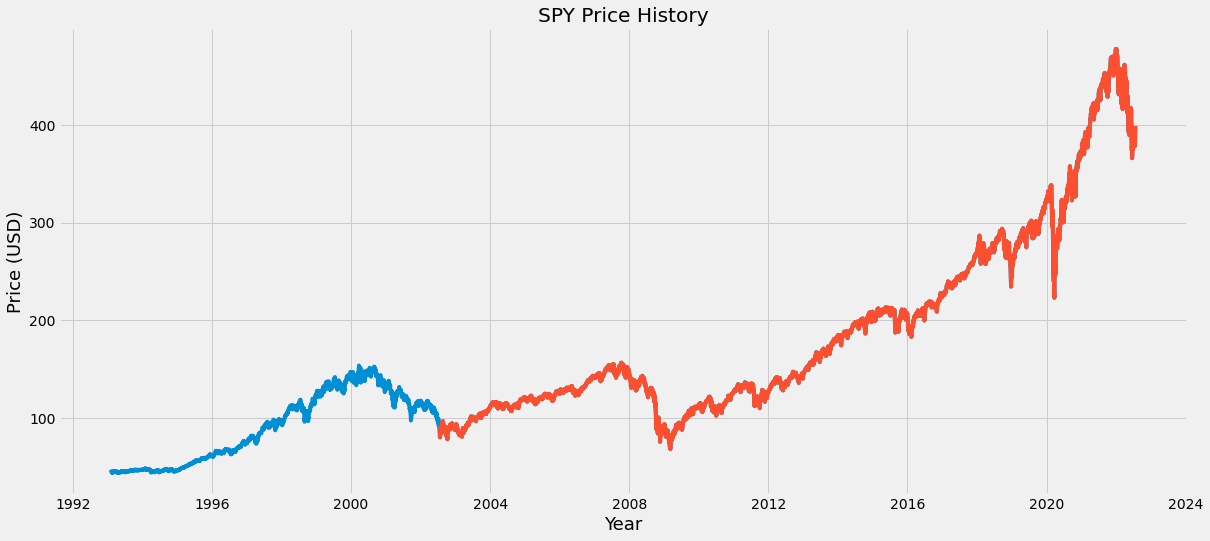

In [77]:
plt.figure(figsize=(18,8))
plt.title("SPY Price History")
plt.plot(df["Close"])
plt.plot(recent_df["Close"]) # Plots the recent subset of the total dataset in a different color
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Price (USD)", fontsize = 18)
plt.show()

In [78]:
data = df.filter(["Close"])
dataset = data.values
training_data_length = math.ceil(len(dataset) * 0.95) # Training data percentage is high because predictions are largely based on very recent activity
print(training_data_length)

recent_data = recent_df.filter(["Close"])
recent_dataset = recent_data.values
recent_training_data_length = math.ceil(len(recent_dataset) * 0.95) # Training data percentage is high because predictions are largely based on very recent activity
print(recent_training_data_length)


7052
4785


In [79]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

print()

recent_scaled_data = scaler.fit_transform(recent_dataset)
print(recent_scaled_data)

[[0.00122322]
 [0.00194276]
 [0.00215863]
 ...
 [0.80327132]
 [0.80902766]
 [0.8182839 ]]

[[0.03439941]
 [0.02890624]
 [0.04055176]
 ...
 [0.79140624]
 [0.79750976]
 [0.80732426]]


In [80]:
train_data = scaled_data[0:training_data_length]
x_train = []
y_train = []
for i in range(60, training_data_length):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

recent_train_data = recent_scaled_data[0:recent_training_data_length]
recent_x_train = []
recent_y_train = []
for i in range(60, recent_training_data_length):
  recent_x_train.append(recent_train_data[i-60:i, 0])
  recent_y_train.append(recent_train_data[i, 0])
  if i <= 60:
    print(recent_x_train)
    print(recent_y_train)
    print()

[array([1.22322225e-03, 1.94276475e-03, 2.15862750e-03, 3.23794125e-03,
       3.66966675e-03, 3.59771250e-03, 3.59771250e-03, 2.87817000e-03,
       3.02207850e-03, 3.52575825e-03, 2.73426150e-03, 1.43908500e-04,
       7.19542500e-05, 0.00000000e+00, 3.59771250e-04, 7.19542500e-04,
       6.47588250e-04, 1.94276475e-03, 2.15862750e-03, 2.30253600e-03,
       2.01471900e-03, 3.52575825e-03, 3.95748375e-03, 3.38184975e-03,
       3.09403275e-03, 5.39656875e-03, 5.03679750e-03, 5.25266025e-03,
       4.96484325e-03, 3.88552950e-03, 4.38920925e-03, 4.38920925e-03,
       3.74162100e-03, 4.38920925e-03, 3.74162100e-03, 3.16598700e-03,
       3.38184975e-03, 3.38184975e-03, 4.02943800e-03, 3.45380400e-03,
       3.88552950e-03, 4.17334650e-03, 4.10139225e-03, 3.74162100e-03,
       1.58299350e-03, 2.08667325e-03, 1.79885625e-03, 2.15862750e-03,
       2.01471900e-03, 3.45380400e-03, 3.66966675e-03, 3.52575825e-03,
       3.52575825e-03, 3.52575825e-03, 3.09403275e-03, 2.59035300e-03,
     

In [81]:
x_train, y_train = np.array(x_train), np.array(y_train)

recent_x_train, recent_y_train = np.array(recent_x_train), np.array(recent_y_train)

In [82]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

recent_x_train = np.reshape(recent_x_train, (recent_x_train.shape[0], recent_x_train.shape[1], 1))
print(recent_x_train.shape)

(6992, 60, 1)
(4725, 60, 1)


In [83]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

recent_model = Sequential()
recent_model.add(LSTM(50, return_sequences = True, input_shape = (recent_x_train.shape[1],1)))
recent_model.add(LSTM(50, return_sequences = False))
recent_model.add(Dense(25))
recent_model.add(Dense(1))

In [84]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

recent_model.compile(optimizer = "adam", loss = "mean_squared_error")

In [85]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

recent_model.fit(recent_x_train, recent_y_train, batch_size = 1, epochs = 1)

4725/4725 [==============================] - 153s 32ms/step - loss: 4.2436e-04


In [86]:
test_data = scaled_data[training_data_length - 60:]
x_test = []
y_test = dataset[training_data_length:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

recent_test_data = recent_scaled_data[recent_training_data_length - 60:]
recent_x_test = []
recent_y_test = recent_dataset[recent_training_data_length:]
for i in range(60, len(recent_test_data)):
  recent_x_test.append(recent_test_data[i-60:i,0])

In [87]:
x_test = np.array(x_test)

recent_x_test = np.array(recent_x_test)

In [88]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

recent_x_test = np.reshape(recent_x_test, (recent_x_test.shape[0], recent_x_test.shape[1], 1))


In [89]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

recent_predictions = recent_model.predict(recent_x_test)
recent_predictions = scaler.inverse_transform(recent_predictions)


In [90]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

recent_rmse = np.sqrt(np.mean(recent_predictions - recent_y_test)**2)
print(recent_rmse)

0.5580960091233574
2.063412487744335


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


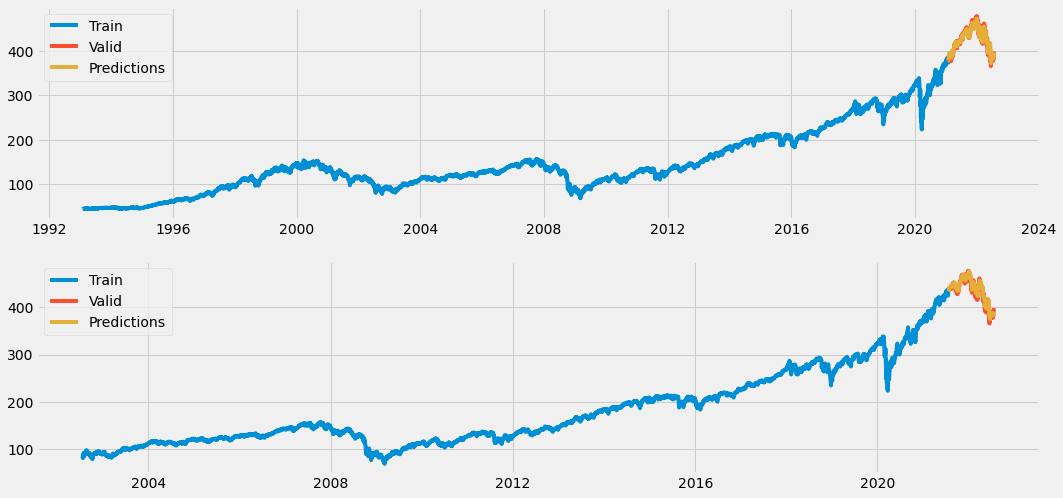

In [123]:
train = data[:training_data_length]
valid = data[training_data_length:]
valid.loc[:, "Predictions"] = predictions
valid.loc[:, "Error"] = abs(valid["Close"] - valid["Predictions"])

recent_train = recent_data[:recent_training_data_length]
recent_valid = recent_data[recent_training_data_length:]
recent_valid.loc[:, "Predictions"] = recent_predictions
recent_valid.loc[:, "Error"] = abs(recent_valid["Close"] - recent_valid["Predictions"])

plt.figure(figsize = (16,8))
plt.title("SPY Price History")
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Price (USD)", fontsize = 18)

plt.subplot(211)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Valid", "Predictions"], loc = "best")

plt.subplot(212)
plt.plot(recent_train["Close"])
plt.plot(recent_valid[["Close", "Predictions"]])
plt.legend(["Train", "Valid", "Predictions"], loc = "best")
plt.show()

In [117]:
valid

,Close,Predictions,Error
Date,,,
2021-02-01,376.230011,378.479645,2.249634
2021-02-02,381.549988,378.324402,3.225586
2021-02-03,381.850006,381.479797,0.370209
2021-02-04,386.190002,384.542267,1.647736
2021-02-05,387.709991,388.295959,0.585968
...,...,...,...
2022-07-15,385.130005,383.380463,1.749542
2022-07-18,381.950012,385.165283,3.215271
2022-07-19,392.269989,386.056885,6.213104


In [118]:
recent_valid

,Close,Predictions,Error
Date,,,
2021-07-23,439.940002,434.046753,5.893250
2021-07-26,441.019989,436.354370,4.665619
2021-07-27,439.010010,438.670532,0.339478
2021-07-28,438.829987,439.906616,1.076630
2021-07-29,440.649994,440.440857,0.209137
...,...,...,...
2022-07-15,385.130005,383.562927,1.567078
2022-07-18,381.950012,383.939392,1.989380
2022-07-19,392.269989,384.146667,8.123322


In [94]:
# Calcualte model accuracy for both datasets
from sklearn.metrics import r2_score

accuracy = r2_score(valid["Close"], valid["Predictions"])
print("Model accuracy for large/complete dataset: {}%".format(round(accuracy * 100, 2)))

recent_accuracy = r2_score(recent_valid["Close"], recent_valid["Predictions"])
print("Model accuracy for recent dataset: {}%".format(round(recent_accuracy * 100, 2)))

Model accuracy for large/complete dataset: 94.86%
Model accuracy for recent dataset: 92.06%


In [95]:
new_df = df.filter(["Close"])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
new_x_test = []
new_x_test.append(last_60_days_scaled)
new_x_test = np.array(new_x_test)
new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))
pred_price = model.predict(new_x_test, )
pred_price = scaler.inverse_transform(pred_price)
print("Predicted close price for SPY for next trading day using full dataset: ${:0.2f}".format(round(pred_price[0][0], 2)))

recent_new_df = recent_df.filter(["Close"])
recent_last_60_days = recent_new_df[-60:].values
recent_last_60_days_scaled = scaler.transform(recent_last_60_days)
recent_new_x_test = []
recent_new_x_test.append(recent_last_60_days_scaled)
recent_new_x_test = np.array(recent_new_x_test)
recent_new_x_test = np.reshape(recent_new_x_test, (recent_new_x_test.shape[0], recent_new_x_test.shape[1], 1))
recent_pred_price = recent_model.predict(recent_new_x_test, )
recent_pred_price = scaler.inverse_transform(recent_pred_price)

print("Predicted close price for next trading day SPY using a more recent dataset: ${:0.2f}".format(round(recent_pred_price[0][0], 2)))

Predicted close price for SPY for next trading day using full dataset: $395.82
Predicted close price for next trading day SPY using a more recent dataset: $394.11


In [126]:
new_df = df.filter(["Close"])
recent_new_df = recent_df.filter(["Close"])

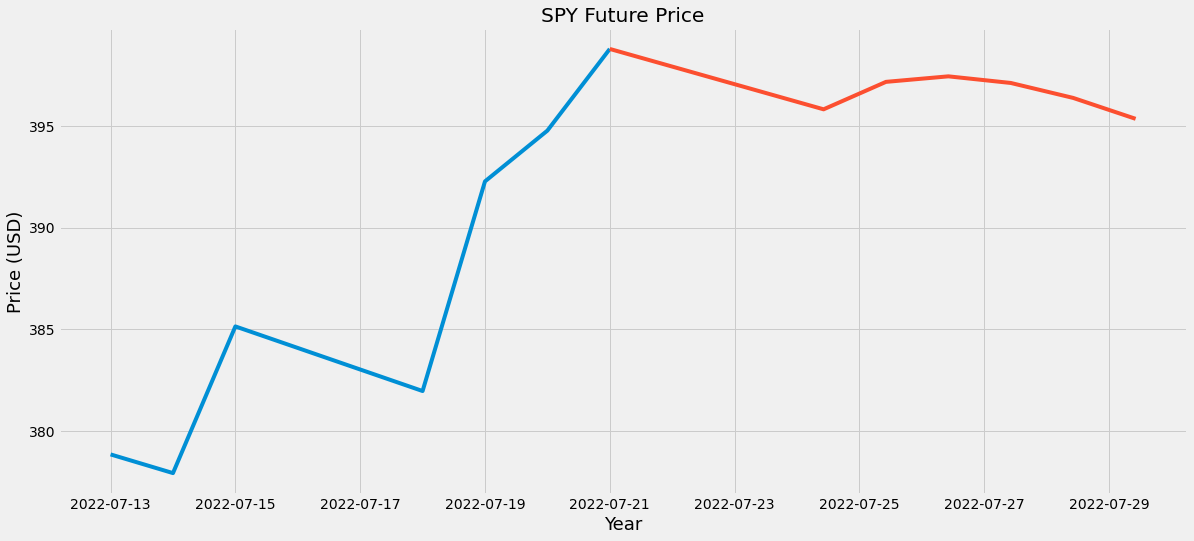

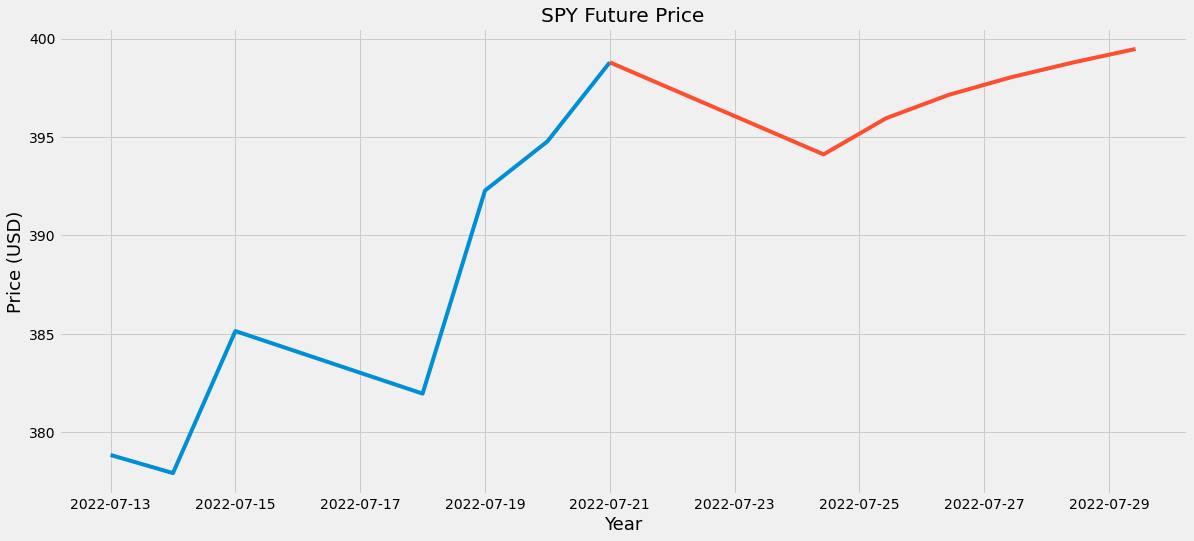

In [127]:
# Predicts and plots future trajectory of stock for the next week (seven days, predicting any longer would be inaccurate due to market fluctuations) based on past data.
for i in range(1, 7):
  last_60_days = new_df[-60:].values
  last_60_days_scaled = scaler.transform(last_60_days)
  new_x_test = []
  new_x_test.append(last_60_days_scaled)
  new_x_test = np.array(new_x_test)
  new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))
  pred_price = model.predict(new_x_test, )
  pred_price = scaler.inverse_transform(pred_price)
  new_df = new_df.append(pd.Series({"Close": pred_price[0][0]}, name = dt.datetime.today() + relativedelta(days= i + 1)))

plt.figure(figsize=(18,8))
plt.title("SPY Future Price")
plt.plot(recent_df["Close"][-7:])
plt.plot(new_df["Close"][-7:])
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Price (USD)", fontsize = 18)
plt.show()

for i in range(1, 7):
  recent_last_60_days = recent_new_df[-60:].values
  recent_last_60_days_scaled = scaler.transform(recent_last_60_days)
  recent_new_x_test = []
  recent_new_x_test.append(recent_last_60_days_scaled)
  recent_new_x_test = np.array(recent_new_x_test)
  recent_new_x_test = np.reshape(recent_new_x_test, (recent_new_x_test.shape[0], recent_new_x_test.shape[1], 1))
  recent_pred_price = recent_model.predict(recent_new_x_test, )
  recent_pred_price = scaler.inverse_transform(recent_pred_price)
  recent_new_df = recent_new_df.append(pd.Series({"Close": recent_pred_price[0][0]}, name = dt.datetime.today() + relativedelta(days= i + 1)))

plt.figure(figsize=(18,8))
plt.title("SPY Future Price")
plt.plot(recent_df["Close"][-7:])
plt.plot(recent_new_df["Close"][-7:])
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Price (USD)", fontsize = 18)
plt.show()